In [1]:
import sys
sys.path.append('/Users/IzmailovPavel/Documents/Education/GPproject/gplib/')
import numpy as np
% load_ext autoreload
% autoreload 2
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
from gplib.gpc import GPCLaplace, GPCSparse
from gplib.optim.methods import *
from gplib.covfun import SE

In [3]:
dim = 2
num = 200
test_num= 100
x_tr = np.random.rand(num, dim)
if dim == 1:
    x_te = np.linspace(0, 1, test_num)
    x_te = x_test.reshape(test_num, 1)
else:
    x_te = np.random.rand(test_num, dim)

In [4]:
data_gp = GPCLaplace(SE(np.array([1., .2, .1])))

In [5]:
y_tr, y_te = data_gp.generate_data(x_tr, x_te, seed=21)

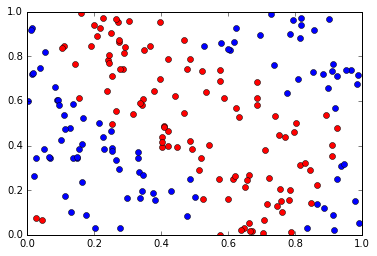

In [6]:
plt.plot(x_tr[y_tr[:, 0] == 1, 0], x_tr[y_tr[:, 0] == 1, 1], 'bo')
plt.plot(x_tr[y_tr[:, 0] == -1, 0], x_tr[y_tr[:, 0] == -1, 1], 'ro')

## Laplace

In [15]:
gp = GPCLaplace(SE(np.array([2., .5, .2])))

In [16]:
gp.fit(x_tr, y_tr, max_iter=10)

Iteration  0
Hyper-parameters at iteration  0 :  [ 2.68799916  0.44610799  0.15608633]


([array([ 2.68799916,  0.44610799,  0.15608633]),
  array([ 3.08273837,  0.3892484 ,  0.13196569]),
  array([ 3.37572318,  0.33181688,  0.12111267]),
  array([ 3.22468905,  0.27167277,  0.14829619]),
  array([ 3.56563711,  0.23806956,  0.11368648]),
  array([ 3.72722161,  0.21077022,  0.09807497]),
  array([ 3.60190555,  0.18600184,  0.09383495]),
  array([ 3.5294776 ,  0.16776758,  0.09146584]),
  array([ 3.30315798,  0.15115759,  0.11646089]),
  array([ 3.43551123,  0.14541593,  0.10014437])],
 [0.30989694595336914,
  0.6918628215789795,
  1.1473619937896729,
  1.894948959350586,
  2.3856258392333984,
  2.8365769386291504,
  3.292442798614502,
  3.643946886062622,
  4.160959959030151,
  4.538885831832886])

In [17]:
y_pred = gp.predict(x_te, x_tr, y_tr)

In [18]:
gp.get_quality(y_te, y_pred)

0.92000000000000004

## Inducing Inputs
### svi

In [77]:
gp = GPCSparse(SE(np.array([1., .7, .2])), inputs=30)

In [79]:
options = {'optimizer': 'AdaDelta'}
batch_size = 20
options = {'optimizer': AdaDelta(disp=10, iter_per_epoch=y_tr.size/batch_size, n_epoch=50, step_rate=.7)}
res = gp.fit(x_tr, y_tr, method='svi', options=options)

Epoch 10 :
	x [ 0.92954444  0.20106221  0.21223753 -0.02837061  0.02001747]
	Gradient norm 2.23403590059
Epoch 20 :
	x [ 1.20117337  0.19825671  0.02074532  0.06584122 -0.04430601]
	Gradient norm 7.24459414603
Epoch 30 :
	x [  1.54587796e+00   2.09295410e-01  -6.21837961e-04   1.43056395e-01
  -7.22060287e-02]
	Gradient norm 4.6457564525
Epoch 40 :
	x [  1.88165908e+00   2.15419303e-01   1.04576715e-05   2.18294992e-01
  -9.89057820e-02]
	Gradient norm 5.64468978776
Epoch 50 :
	x [  2.20489843e+00   2.30472859e-01   9.32763567e-04   2.98334298e-01
  -1.15710756e-01]
	Gradient norm 4.32500929518


In [80]:
y_pred = gp.predict(x_te)

In [81]:
gp.get_quality(y_te, y_pred)

0.93999999999999995

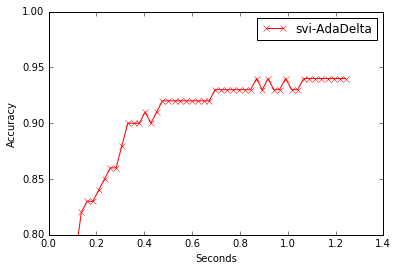

In [82]:
metric = lambda w: gp.get_prediction_quality(x_te, y_te, w)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst[1:], y_lst[1:], '-rx', label='svi-AdaDelta')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-JJ

In [83]:
gp = GPCSparse(SE(np.array([1., .5, .2])), inputs=30)

In [84]:
options = {'optimizer': LBFGS(disp=False, maxfun=5), 'maxiter': 20, 'disp':5}
# options = {'optimizer': LBFGS(disp=False, maxfun=5), 'maxiter': 20, 'disp':5}
res = gp.fit(x_tr, y_tr, method='JJ', options=options)

Outter iteration 0 :
	parameters: [ 1.29692175 -0.20763821  0.0036312 ]
Outter iteration 5 :
	parameters: [  2.23757706e+00  -2.14958786e-01  -6.72924725e-06]
Outter iteration 10 :
	parameters: [  2.62473472e+00  -2.11539238e-01   1.89681162e-08]
Outter iteration 15 :
	parameters: [  3.01781465e+00  -2.23638543e-01  -1.96340451e-11]


In [85]:
y_pred = gp.predict(x_te)

In [86]:
gp.get_quality(y_te, y_pred)

0.92000000000000004

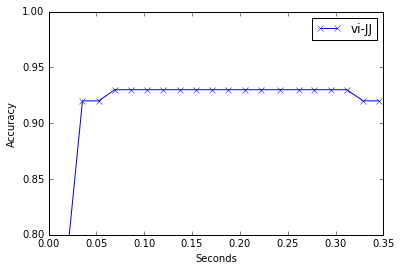

In [87]:
metric = lambda w: gp.get_prediction_quality(x_te, y_te, w)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst, y_lst, '-bx', label='vi-JJ')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-Taylor

In [88]:
gp = GPCSparse(SE(np.array([1., .5, .2])), inputs=30)

In [89]:
options = {'optimizer': FGD(disp=False, maxiter=5), 'maxiter': 40, 'disp':5}
res = gp.fit(x_tr, y_tr, method='Taylor', options=options)

Outter iteration 0 :
	parameters: [ 1.11982794  0.22561988  0.02350254]
Outter iteration 5 :
	parameters: [ 1.54728719  0.1850211   0.01      ]
Outter iteration 10 :
	parameters: [ 1.7971259   0.20656774  0.01      ]
Outter iteration 15 :
	parameters: [ 2.00743883  0.20305704  0.01      ]
Outter iteration 20 :
	parameters: [ 2.35259316  0.21262503  0.01      ]
Outter iteration 25 :
	parameters: [ 2.49316511  0.20850201  0.01      ]
Outter iteration 30 :
	parameters: [ 3.60296367  0.23000754  0.01      ]
Outter iteration 35 :
	parameters: [ 6.70762488  0.27081831  0.01      ]


In [90]:
y_pred = gp.predict(x_te)

In [91]:
gp.get_quality(y_te, y_pred)

0.92999999999999994

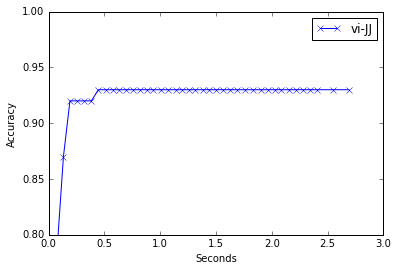

In [92]:
metric = lambda w: gp.get_prediction_quality(x_te, y_te, w)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst, y_lst, '-bx', label='vi-JJ')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-JJ-hybrid

In [93]:
gp = GPCSparse(SE(np.array([1., .5, .2])), inputs=30)

In [94]:
options = {'optimizer': LBFGS(disp=False, maxfun=5), 'maxiter': 20, 'disp':5}
res = gp.fit(x_tr, y_tr, method='JJ_hybrid', options=options)

Outter iteration 0 :
	parameters: [  1.30048337e+00  -2.32133236e-01   6.92595595e-04   1.04496299e+00
   1.10912979e+00]
Outter iteration 5 :
	parameters: [  2.34704341e+00  -2.26870465e-01   1.37171484e-06   4.47750724e+00
   3.58936181e+00]
Outter iteration 10 :
	parameters: [  2.76797626e+00  -2.19234623e-01   1.64280886e-08   5.38928692e+00
   4.21325931e+00]
Outter iteration 15 :
	parameters: [  3.17842066e+00  -2.22652287e-01  -2.37384848e-10   5.96449236e+00
   4.60559525e+00]


In [95]:
y_pred = gp.predict(x_te)

In [96]:
gp.get_quality(y_te, y_pred)

0.92000000000000004

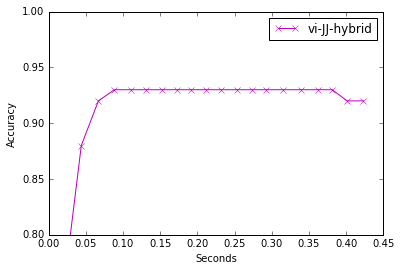

In [97]:
metric = lambda w: gp.get_prediction_quality(x_te, y_te, w)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst, y_lst, '-mx', label='vi-JJ-hybrid')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')

### vi-JJ-full

In [98]:
gp = GPCSparse(SE(np.array([1., .5, .2])), inputs=30)

In [99]:
options = {'optimizer': LBFGS(disp=False, maxiter=100)}
res = gp.fit(x_tr, y_tr, method='JJ_full', options=options)

In [100]:
y_pred = gp.predict(x_te)

In [101]:
gp.get_quality(y_te, y_pred)

0.92999999999999994

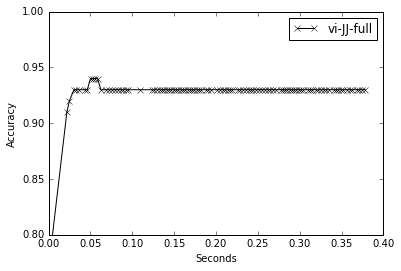

In [102]:
metric = lambda w: gp.get_prediction_quality(x_te, y_te, w)
x_lst, y_lst = res.plot_performance(metric, 't', freq=1)
plt.plot(x_lst, y_lst, '-kx', label='vi-JJ-full')
plt.ylim([.8, 1.])
plt.legend()
plt.xlabel('Seconds')
plt.ylabel('Accuracy')